In [2]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt
from scipy.fft import fftfreq, fft

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Types of Fourier Transforms

## 1. For Continuous Time and Frequency:

When the Functional Form of the Time Series is known analytically and goes from $-\infty$ to $\infty$:$$\hat x(f)=\int_{-\infty}^{\infty} x(t)e^{-2\pi ift}\,dt$$

Analytical Solution:

In [7]:
t, f = smp.symbols('t f', real = True)
k = smp.symbols('k', real = True, positive = True)

x = smp.exp(-k * t ** 2) * k * t

In [4]:
from sympy.integrals.transforms import fourier_transform

In [5]:
fourier_transform(x, t, f)

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

Numerical Solution:

In [20]:
from scipy.integrate import quad

In [30]:
def x(t, k):
    return np.exp(-k * t ** 2) * k * t

def ft(x, f, k):
    integrand_real = lambda t: np.real(x(t, k) * np.exp(-2 * np.pi * 1j * f * t))
    integrand_comp = lambda t: np.imag(x(t, k) * np.exp(-2 * np.pi * 1j * f * t))
    
    ft_real = quad(integrand_real, -np.inf, np.inf)[0]
    ft_comp = quad(integrand_comp, -np.inf, np.inf)[0]

    return ft_real + 1j * ft_comp

In [31]:
f = np.linspace(-4, 4, 100)
x_ft = np.vectorize(ft)(x, f, k = 2)

Text(0.5, 1.0, '(Continous) Unbounded Fourier Transform')

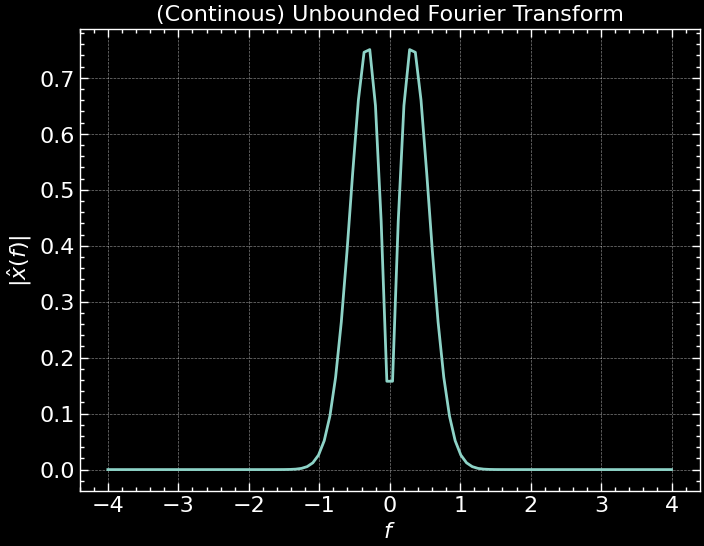

In [32]:
plt.plot(f, np.abs(x_ft))
plt.xlabel(r'$f$')
plt.ylabel(r'$|\hat{x}(f)|$')
plt.title('(Continous) Unbounded Fourier Transform')

## For Continuous Time but Discrete Frequency:

When $x(t)$ is bounded by finite times $0$ and $T$:$$\hat x(f_n)=\frac{1}{T}\int_0^T x(t)e^{-2\pi if_nt}\,dt$$ where $f_n=n/T$.

In [12]:
t = smp.symbols('t', real = True)
k, n, T = smp.symbols('k n T', real = True, positive = True)

fn = n / T
x = smp.sin(k * t)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in true_divide
  return select([equal(k, 6.28318530717959*n/T),True], [((3968.80341507838 - 402.123859659494*pi**2)*exp(2.0*1j*pi*n) - 1263.30936333944*1j*pi*sin(6.28318530717959*n) + 128.0*1j*pi**3*sin(6.28318530717959*n) - 3968.80341507838*cos(6.28318530717959*n) + 402.123859659494*pi**2*cos(6.28318530717959*n))*exp(-2.0*1j*pi*n)/(n*(-5053.23745335775*pi**2 + 24936.7273047046 + 256.0*pi**4)),(-16.0*T**3*k**3*cos(T*k) - 32.0*1j*pi*T**2*k**2*n*sin(T*k) + 64.0*pi**2*T*k*n**2*cos(T*k) + T*k*(16.0*T**2*k**2 - 64.0*pi**2*n**2)*exp(2.0*1j*pi*n) + 128.0*1j*pi**3*n**3*sin(T*k))*exp(-2.0*1j*pi*n)/(16.0*T**4*k**4 - 128.0*pi**2*T**2*k**2*n**2 + 256.0*pi**4*n**4)], default=nan)


Text(0, 0.5, '$|\\hat{x}_n|$')

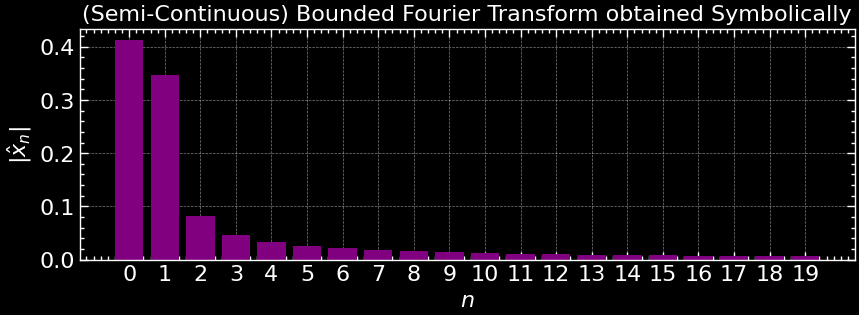

In [17]:
x_ft = smp.integrate(1 / T * x * smp.exp(-2 * smp.pi * 1j * fn * t), (t, 0, T)).simplify()
ft = smp.lambdify([k, T, n], x_ft)

ns = np.arange(0, 20, 1)
get_ft = ft(k = 1, T = 4, n = ns)

plt.figure(figsize = (10, 3))
plt.bar(ns, np.abs(get_ft), color = 'purple')
plt.title('(Semi-Continuous) Bounded Fourier Transform obtained Symbolically')
plt.xticks(ns)
plt.xlabel(r'$n$')
plt.ylabel(r'$|\hat{x}_n|$')


Numerical Solution (Analytical Solution may not work for every function):

Consider $$x(t)=\frac{e^{-kt^2}\sin(kt)}t$$ and 
- $k = 2$
- $T = 4$ 

In [18]:
def x(t, k):
    return np.exp(-k * t ** 2) * np.sin(k * t) / t

def ft(x, n, k, T):
    integrand_real = lambda t: np.real(x(t, k) * np.exp(-2 * np.pi * 1j * (n / T) * t))
    integrand_comp = lambda t: np.imag(x(t, k) * np.exp(-2 * np.pi * 1j * (n / T) * t))

    ft_real = quad(integrand_real, 0, T)[0]
    ft_comp = quad(integrand_comp, 0, T)[0]

    return ft_real + 1j * ft_comp

In [21]:
ns = np.arange(0, 20, 1)
x_ft = np.vectorize(ft)(x, ns, k = 2, T = 4)

Text(0, 0.5, '$|\\hat{x}_n|$')

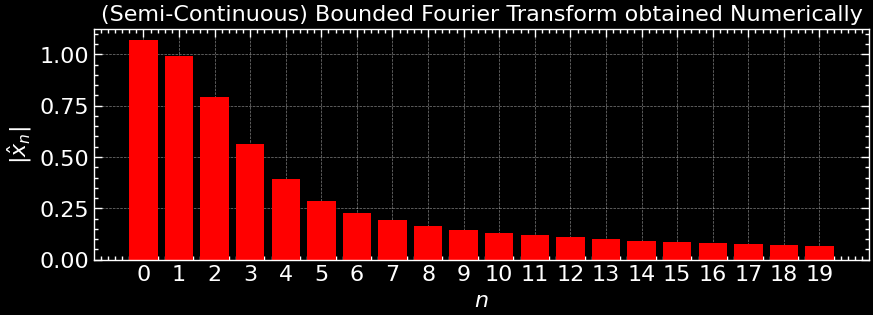

In [22]:
plt.figure(figsize = (10, 3))
plt.bar(ns, np.abs(x_ft), color = 'red')
plt.title('(Semi-Continuous) Bounded Fourier Transform obtained Numerically')
plt.xticks(ns)
plt.xlabel(r'$n$')
plt.ylabel(r'$|\hat{x}_n|$')

## 3. For Discrete Time and Discrete Frequency:

When a discrete Time Series $x_t$ is measured for a finite amount of time:$$\hat{x}(f_n)=\sum_{j = 0}^{N-1}x_t\,e^{\displaystyle -2\pi if_n(j \delta t)}\,\delta t$$ and 
- $f_n=\displaystyle \frac{n}{N\delta t}$ are the Fourier Frequencies
- $N$ measurements are taken so that $N \delta t = T$

In [11]:
T = 40
N = 100

t = np.linspace(0, T, N)
dt = np.diff(t)[0]

In [12]:
f1 = 20 / (N * dt)
f2 = 10 / (N * dt)
f3 = (10 + 5 * N) / (N * dt)

In [13]:
x1 = np.sin(2 * np.pi * f1 * t) + 0.3 * np.sin(2 * np.pi * f2 * t) + 0.3 * np.random.randn(len(t))
x2 = np.sin(2 * np.pi * f2 * t) + 0.1 * np.random.randn(len(t))
x3 = np.sin(2 * np.pi * f3 * t) + 0.1 * np.random.randn(len(t))

Text(0, 0.5, 'Signal Strength [Arb. Units]')

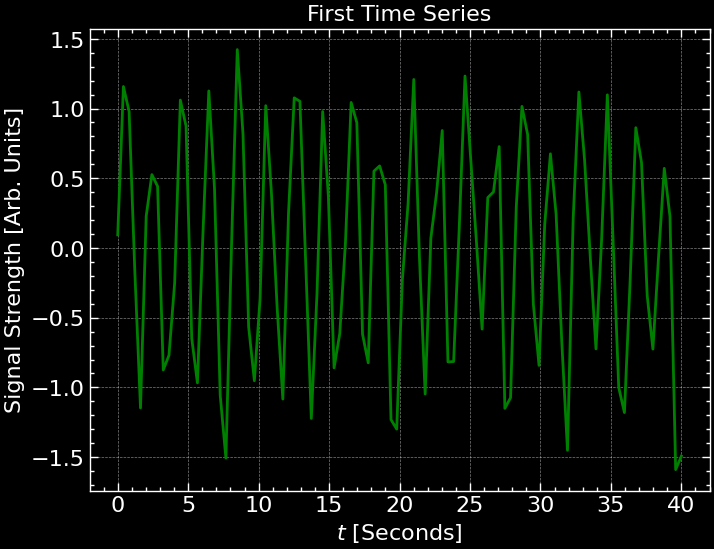

In [14]:
plt.plot(t, x1, color = 'green')
plt.title('First Time Series')
plt.xlabel(r'$t$ [Seconds]')
plt.ylabel('Signal Strength [Arb. Units]')

Text(0, 0.5, '$|\\hat{x}_1|$')

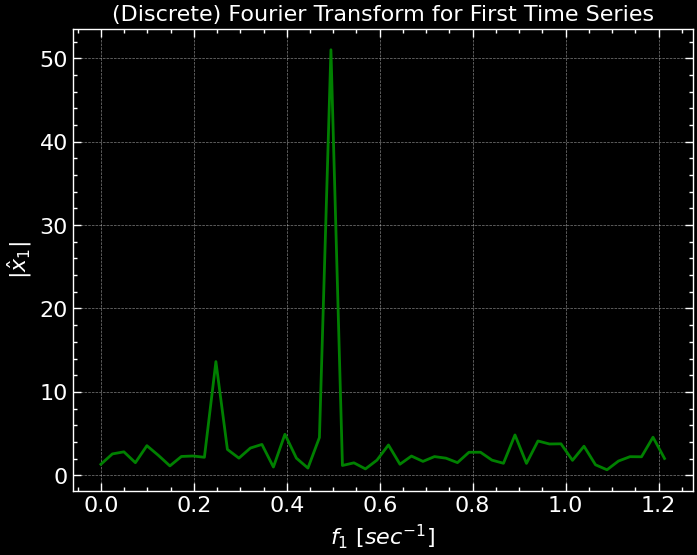

In [15]:
f = fftfreq(len(t), np.diff(t)[0])
x1_fft = fft(x1)

plt.plot(f[:N // 2], np.abs(x1_fft[:N // 2]), color = 'green')
plt.title('(Discrete) Fourier Transform for First Time Series')
plt.xlabel(r'$f_1$ [${sec}^{-1}$]')
plt.ylabel(r'$|\hat{x}_1|$')

$\hat{x}_n=\hat{x}_{n+5N}$

Text(0, 0.5, 'Signal Strength [Arb. Units]')

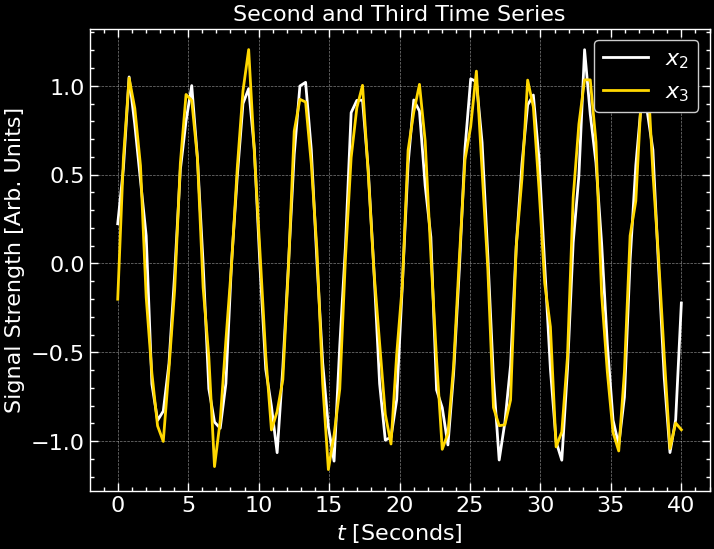

In [16]:
plt.plot(t, x2, label = r'$x_2$', color = 'white')
plt.plot(t, x3, label = r'$x_3$', color = 'gold')

plt.title('Second and Third Time Series')
plt.legend()
plt.xlabel(r'$t$ [Seconds]')
plt.ylabel('Signal Strength [Arb. Units]')

Text(0, 0.5, '$|\\hat{x}_j|$')

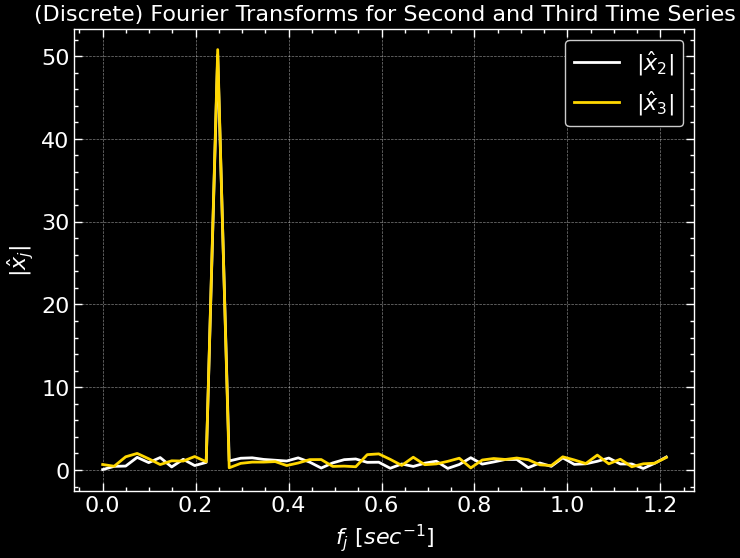

In [17]:
x2_fft = fft(x2)
x3_fft = fft(x3)

plt.plot(f[:N // 2], np.abs(x2_fft[:N // 2]), label = r'$|\hat{x}_2|$', color = 'white')
plt.plot(f[:N // 2], np.abs(x3_fft[:N // 2]), label = r'$|\hat{x}_3|$', color = 'gold')
plt.title('(Discrete) Fourier Transforms for Second and Third Time Series')
plt.legend()
plt.xlabel(r'$f_j$ [${sec}^{-1}$]')
plt.ylabel(r'$|\hat{x}_j|$')
